In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={
    'figure.figsize':(20, 10)
})


import warnings

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('depression_dataset.csv')
df.shape

(1007, 21)

In [ ]:

df.drop(['Timestamp'], axis=1, inplace=True)
# depression.head()
df.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,4th year,Normal,65,Male,22,Home,Single,Yes,3,Good,Yes,No,Yes,Family,Yes,Yes,Yes,No,No,8
1,4th year,Good,75,Male,22,Home,Single,Yes,3,Normal,Yes,No,Yes,Family,No,No,Yes,Yes,No,6
2,2nd year,Bad,25,Male,22,Home,Single,Yes,2,Normal,Yes,No,No,No one,Yes,Yes,Yes,Yes,Yes,6
3,3rd year,Bad,25,Male,22,Home,Single,Yes,1,Good,Yes,Yes,No,Family,Yes,Yes,Yes,Yes,Yes,6
4,1st year,Normal,50,Male,22,Home,Single,Yes,3,Good,Yes,No,Yes,No one,Yes,Yes,Yes,Yes,Yes,6


In [ ]:
from sklearn.preprocessing import LabelEncoder
dataset_encoded=df.iloc[:,0:20]

le=LabelEncoder()

for i in dataset_encoded:
    dataset_encoded[i]=le.fit_transform(dataset_encoded[i])

dataset_encoded.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,3,2,29,0,3,2,0,1,2,0,1,0,1,0,2,3,2,0,0,4
1,3,1,33,0,3,2,0,1,2,1,1,0,1,0,0,1,2,1,0,2
2,1,0,9,0,3,2,0,1,1,1,1,0,0,2,2,3,2,1,1,2
3,2,0,9,0,3,2,0,1,0,0,1,2,0,0,2,3,2,1,1,2
4,0,2,19,0,3,2,0,1,2,0,1,0,1,2,2,3,2,1,1,2


In [ ]:
dataset_encoded.dtypes

Which year are you in?                                                                          int64
How are you feeling right now?                                                                  int64
On a scale of 1-100, how would you express this feeling?                                        int64
Gender                                                                                          int64
Age                                                                                             int64
Your location ?                                                                                 int64
Relationship status                                                                             int64
Are you happy with your financial state?                                                        int64
How much have you succeeded to cope up with the environment of your educational institution?    int64
Understanding with your family members?                                           

In [ ]:
X=dataset_encoded.drop('How are you feeling right now?', axis=1)
y=dataset_encoded['How are you feeling right now?']

In [ ]:
cols=X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X=scaler.fit_transform(X)

In [ ]:
X=pd.DataFrame(X, columns=[cols])

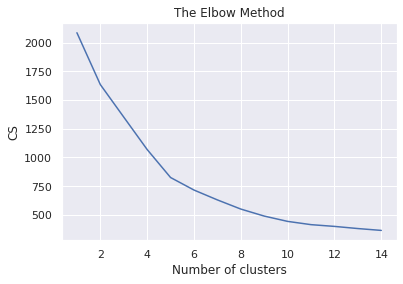

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 15):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

# Implementing K-means

In [ ]:
from scipy.spatial.distance import cdist 
 
def kmeans(data,k, epochs):
    idx=np.random.choice(len(data), k, replace=False)
    centroids=data[idx, :]
    distances=cdist(data, centroids ,'euclidean')
    points=np.array([np.argmin(i) for i in distances])
    for _ in range(epochs): 
        centroids=[]
        for idx in range(k):
            temp_cent=data[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
        centroids=np.vstack(centroids) 
        distances=cdist(data, centroids ,'euclidean')
        points=np.array([np.argmin(i) for i in distances])
         
    return points 

In [ ]:
from sklearn.decomposition import PCA

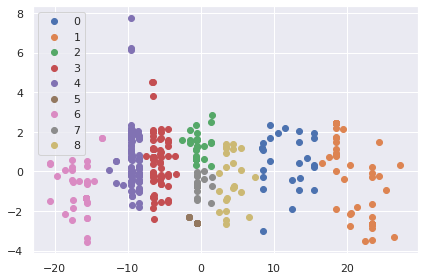

In [ ]:
pca=PCA(2)
df=pca.fit_transform(dataset_encoded)
label=kmeans(df,9,1000) 
unique_labels = np.unique(label)
for i in unique_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8])